In [ ]:
# Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.
# Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.shape

(768, 9)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.replace(to_replace = 0, value = data['Glucose'].mean(), inplace=True)
data.replace(to_replace = 0, value = data['BloodPressure'].mean(), inplace=True)
data.replace(to_replace = 0, value = data['SkinThickness'].mean(), inplace=True)
data.replace(to_replace = 0, value = data['Insulin'].mean(), inplace=True)
data.replace(to_replace = 0, value = data['BMI'].mean(), inplace=True)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,21.318090,121.681605,74.614985,56.269608,138.672597,33.724140,0.471876,33.240885,79.056335
std,41.064012,30.436016,15.770971,42.801250,86.769787,12.562976,0.331329,11.760232,57.183862
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.000000
25%,2.000000,99.750000,64.000000,25.000000,120.670898,27.500000,0.243750,24.000000,1.000000
50%,5.000000,117.000000,73.000000,35.000000,120.894531,32.400000,0.372500,29.000000,120.894531
75%,9.000000,140.250000,82.000000,120.894531,127.250000,36.825000,0.626250,41.000000,120.894531
max,120.894531,199.000000,122.000000,120.894531,846.000000,120.894531,2.420000,81.000000,120.894531


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    float64
 1   Glucose        768 non-null    float64
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Outcome,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Outcome', ylabel='count'>

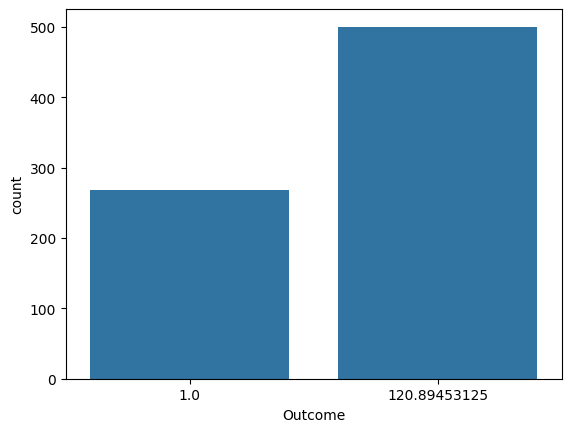

In [ ]:
sns.countplot(x = data["Outcome"])

<Axes: xlabel='Pregnancies'>

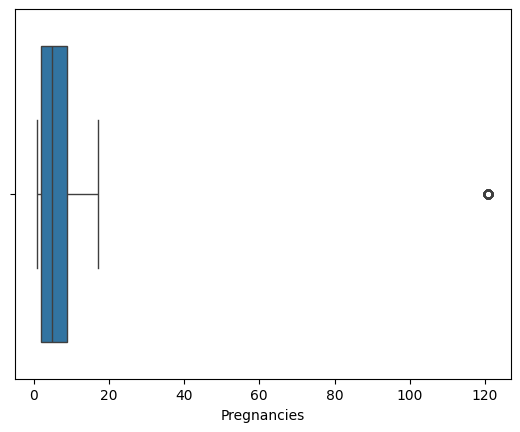

In [ ]:
sns.boxplot(data = data, x = 'Pregnancies')

<Axes: xlabel='Glucose'>

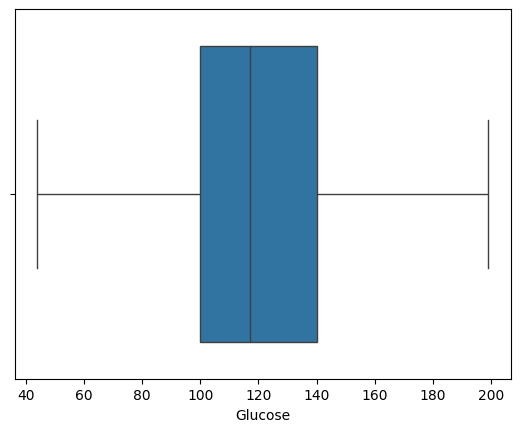

In [ ]:
sns.boxplot(data = data, x = 'Glucose')

<Axes: xlabel='BloodPressure'>

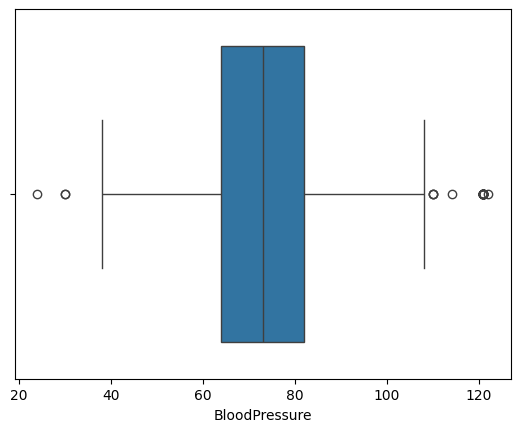

In [ ]:
sns.boxplot(data = data, x = 'BloodPressure')

<Axes: xlabel='SkinThickness'>

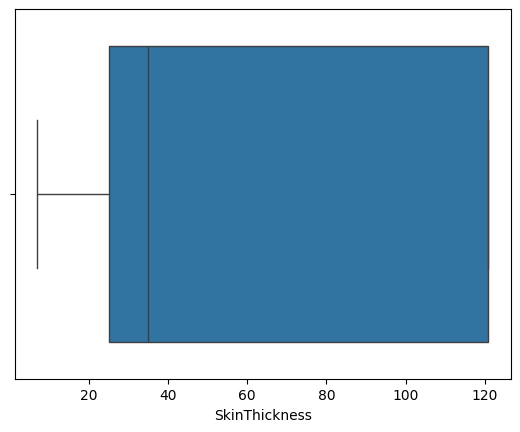

In [ ]:
sns.boxplot(data = data, x = 'SkinThickness')

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.028956,0.105036,0.022153,0.010636,0.131131,0.060210,-0.159567,-0.012298
Glucose,0.028956,1.000000,0.149646,0.076481,0.418008,0.068632,0.137106,0.266600,-0.492908
BloodPressure,0.105036,0.149646,1.000000,0.314617,0.002984,0.314471,-0.037455,0.218822,-0.159202
SkinThickness,0.022153,0.076481,0.314617,1.000000,-0.098372,0.118869,-0.129723,0.242580,-0.095702
Insulin,0.010636,0.418008,0.002984,-0.098372,1.000000,0.075288,0.129876,0.091654,-0.201913
BMI,0.131131,0.068632,0.314471,0.118869,0.075288,1.000000,0.072186,-0.009954,-0.135323
Pedigree,0.060210,0.137106,-0.037455,-0.129723,0.129876,0.072186,1.000000,0.033561,-0.173844
Age,-0.159567,0.266600,0.218822,0.242580,0.091654,-0.009954,0.033561,1.000000,-0.238356
Outcome,-0.012298,-0.492908,-0.159202,-0.095702,-0.201913,-0.135323,-0.173844,-0.238356,1.000000


In [ ]:
X = data.iloc[:,0:8]
X.shape

(768, 8)

In [ ]:
Y = data['Outcome']
Y.shape

(768,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
print("The shapes of the test and train dataset are:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

The shapes of the test and train dataset are:
(614, 8) (154, 8) (614,) (154,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
model.score(X_test, y_test)

0.6753246753246753

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

In [ ]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[87, 12],
       [38, 17]])

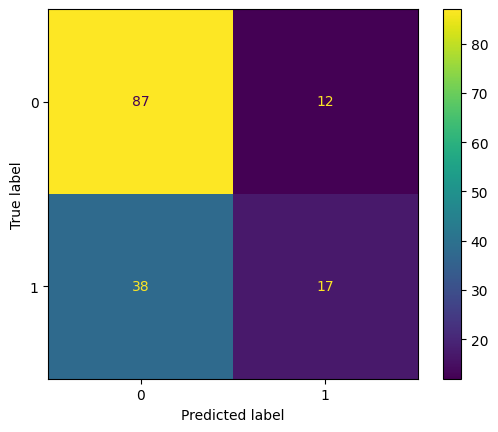

In [ ]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [ ]:
print("Accuracy: ")
accuracy_score(y_test, y_pred)

Accuracy: 


0.6753246753246753

In [ ]:
print("Precision: ")
precision_score(y_test, y_pred)

Precision: 


0.5862068965517241

In [ ]:
print("Recall: ")
recall_score(y_test, y_pred)

Recall: 


0.3090909090909091

In [ ]:
print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.3246753246753247

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        99
           1       0.59      0.31      0.40        55

    accuracy                           0.68       154
   macro avg       0.64      0.59      0.59       154
weighted avg       0.66      0.68      0.64       154

